In [10]:
# Inclusão de bibliotecas
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint, rand, uniform
from math import pi, sin
from IPython.display import clear_output
from time import sleep

In [11]:
def encode(bitstring):
    encode = []
    bitstring = bitstring.split(".")
    for i in bitstring:
        temp = []
        for j in i:
            temp.append(int(j))
        encode.append(temp)
    return encode


def decode(bitstring):
    decoded = ""
    tempR = []
    for i in bitstring:
        temp = ""
        for j in i:
            temp += str(j)
        tempR.append(temp)

    return tempR[0] + "." + tempR[1]


def float_to_bin(num):
    if num < 0:
        num = abs(num)
        num = str(num).split(".")
        num = "0" + bin(int(num[0]))[2:] + "." + bin(int(num[1]))[2:]
    else:
        num = abs(num)
        num = str(num).split(".")
        num = "1" + bin(int(num[0]))[2:] + "." + bin(int(num[1]))[2:]
    return num


def bin_to_float(binary):
    if binary[0] == "0":
        binary = binary[1:]
        binary = binary.split(".")
        return -float(str(int(binary[0], 2)) + "." + str(int(binary[1], 2)))
    else:
        binary = binary[1:]
        binary = binary.split(".")
        return float(str(int(binary[0], 2)) + "." + str(int(binary[1], 2)))


def objective(x):
    if type(x) == str:
        x = bin_to_float(x)
    elif type(x) == float:
        x = x
    else:
        x = bin_to_float(decode(x))
    resp = x * sin(x * 10 * pi) + 1
    return resp


In [12]:
def tournament(amostra, scores, maxQtd):
    while len(amostra) > maxQtd:
        while True:
            i1, i2 = randint(0, len(amostra), 2)
            if i1 != i2:
                break
        if scores[i1] < scores[i2]:
            amostra.pop(i1)
            scores.pop(i1)
        else:
            amostra.pop(i2)
            scores.pop(i2)

In [13]:
XValues=[]
YValues=[]
xFV=[]
yFV=[]
for i in range(-200,200):
  xFV.append(float(i/100))
  yFV.append(objective(float(i/100)))

In [14]:
def defaultPrint(pop, score):
    for i, j in zip(pop, score):
        print(i, bin_to_float(decode(i)), j)


# genetic algorithm
def genetic_algorithm(objective, n_pop=10):
    pop = [encode(float_to_bin(uniform(-2, 2))) for _ in range(n_pop)]

    score = [objective(d) for d in pop]

    return [pop, score]


def plot(sleepingSecs=1, size=[7,7]):
  global xFV
  global yFV
  global XValues
  global YValues
  

  for i,_ in enumerate(XValues):
    plt.figure(figsize=(size[0], size[1]))
    plt.xticks(np.arange(-4, 4, 0.1))
    plt.yticks(np.arange(-4, 4, 0.1))
    fdf = pd.DataFrame({"x_values": xFV, "y_values": yFV})
    plt.plot(fdf["x_values"], fdf["y_values"], color="black")
    # if i>0:
    #   flatXValues = []
    #   flatYValues = []
    #   flatXValues+= [sx for sx in [x for x in XValues[:i]]][0]
    #   flatYValues += [sy for sy in [y for y in YValues[:i]]][0]
    #   # print(flatXValues,flatYValues)
    #   oldDf = pd.DataFrame({"x_values": flatXValues, "y_values": flatYValues})
    #   plt.plot(oldDf["x_values"], oldDf["y_values"], color="gray",marker=".",markersize=12,linestyle="none",markeredgecolor="black")
    df = pd.DataFrame({"x_values": XValues[i], "y_values": YValues[i]})
    plt.plot(df["x_values"], df["y_values"], color="red",marker="o",markersize=12,linestyle="none",markeredgecolor="black")  
    clear_output()
    plt.show()
    sleep(sleepingSecs)

In [15]:
from math import nan
from time import sleep

geracao = 0
mut = 0


def crossOver(individuo_1, individuo_2):
    if len(individuo_1[0]) >= len(individuo_2[0]):
        for i in range(0, len(individuo_1[0]) - len(individuo_2[0])):
            individuo_2[0].insert(1, 0)
    else:
        for i in range(0, len(individuo_2[0]) - len(individuo_1[0])):
            individuo_1[0].insert(1, 0)

    if len(individuo_1[1]) >= len(individuo_2[1]):
        for i in range(0, len(individuo_1[1]) - len(individuo_2[1])):
            individuo_2[1].insert(0, 0)
    else:
        for i in range(0, len(individuo_2[1]) - len(individuo_1[1])):
            individuo_1[1].insert(0, 0)
    filho_1 = [[], []]
    filho_2 = [[], []]
    ponto_de_corte = randint(0, len(individuo_1[0]) - 1)
    filho_1[0] = individuo_1[0][:ponto_de_corte] + individuo_2[0][ponto_de_corte:]
    filho_2[0] = individuo_2[0][:ponto_de_corte] + individuo_1[0][ponto_de_corte:]
    ponto_de_corte = randint(0, len(individuo_1[1]) - 1)
    filho_1[1] = individuo_1[1][:ponto_de_corte] + individuo_2[1][ponto_de_corte:]
    filho_2[1] = individuo_2[1][:ponto_de_corte] + individuo_1[1][ponto_de_corte:]
    return filho_1, filho_2


def mutacao(individuo, probabilidade_de_mutacao):
    global mut
    stts = False
    for i in range(len(individuo)):
        for j in range(len(individuo[i])):
            if rand() <= probabilidade_de_mutacao:
                stts = True
                individuo[i][j] = 1 if individuo[i][j] == 0 else 0
    if stts:
        mut += 1
    return individuo


def iteracao(amostra, probabilidade_de_mutacao):
    nova_amostra = []
    for i in range(len(amostra)):
        filho_1, filho_2 = crossOver(amostra[i], amostra[(i - len(amostra) + 1)])
        nova_amostra.append(filho_1)
        nova_amostra.append(filho_2)
    for j, i in enumerate(nova_amostra):
        nova_amostra[j] = mutacao(i, probabilidade_de_mutacao)
        t = bin_to_float(decode(i))
        if t < -2 or t > 2:
            try:
                nova_amostra[j] = encode(float_to_bin(uniform(-2, 2)))
            except:
                nova_amostra[j] = encode(float_to_bin(uniform(-2, 2)))

    return nova_amostra


def recursao(amostra, maxPop, probabilidade_de_mutacao=0.01):
    global geracao
    global XValues
    global XValues
    while True:

        xValues = []
        yValues = []
        geracao += 1
        amostra = iteracao(amostra, probabilidade_de_mutacao)
        score = []
        for i in amostra:
            scr = objective(decode(i))
            score.append(scr)
            # yValues.append(scr)
            # xValues.append()
            x = bin_to_float(decode(i))
        if geracao > 15000:
            return 0,0
        tournament(amostra, score, maxPop)
        for i,j in zip (amostra, score):
            xValues.append(bin_to_float(decode(i)))
            yValues.append(j)
        XValues.append(xValues)
        YValues.append(yValues)
        # defaultPrint(amostra, score)
        if max(score) >= objective(1.85):
            print("max:", max(score))
            # print("Geração final: ")
            # defaultPrint(amostra, score)
            return amostra, score


In [16]:
print(objective(1.8505474660415))
print(objective(bin_to_float(decode(encode(float_to_bin(1.8505474660415))))))

2.8502737667680984
2.8502737667680984


In [17]:
maxPop = 10
pop, score = genetic_algorithm(objective, maxPop)
# print("Populacao inicial:")
# defaultPrint(pop, score)

pop, score = recursao(pop, maxPop)
print("Geracao: ", geracao)
print("Mutacao: ", mut)


max: 2.8501014016679562
Geracao:  60
Mutacao:  541


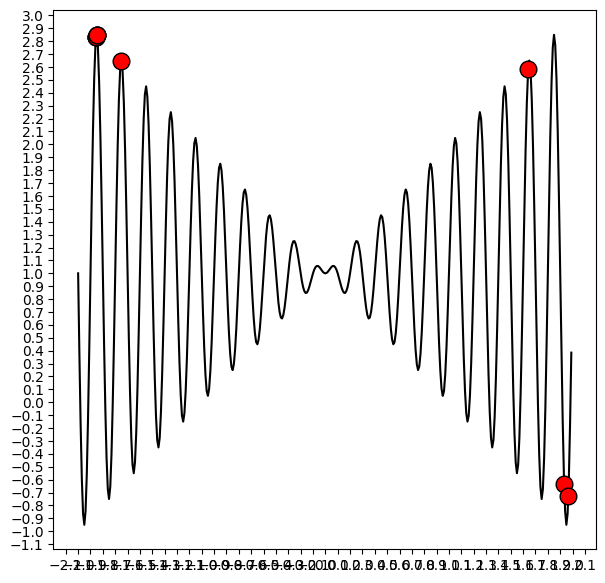

In [18]:
plot(0.5)